In [1326]:
import pandas  as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [1327]:
# readind the dataset
fifa_data=pd.read_csv("./player_stats.csv",encoding='latin1')

In [1328]:
fifa_data.head(1)

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,$1.400.000


In [1329]:
fifa_data.isna().sum()

player               0
country              0
height               0
weight               0
age                  0
club                 0
ball_control         0
dribbling            0
marking           5682
slide_tackle         0
stand_tackle         0
aggression           0
reactions            0
att_position         0
interceptions        0
vision               0
composure            0
crossing             0
short_pass           0
long_pass            0
acceleration         0
stamina              0
strength             0
balance              0
sprint_speed         0
agility              0
jumping              0
heading              0
shot_power           0
finishing            0
long_shots           0
curve                0
fk_acc               0
penalties            0
volleys              0
gk_positioning       0
gk_diving            0
gk_handling          0
gk_kicking           0
gk_reflexes          0
value                0
dtype: int64

In [1330]:
cleaned_fifa_data=fifa_data.drop(columns=["marking"])
cleaned_fifa_data.head()


,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,68,73,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,56,58,...,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,13,16,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,66,69,...,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,14,16,...,9,10,16,5,61,59,62,64,64,$300.00


In [1331]:
# converitg values to float 
values=cleaned_fifa_data["value"]
numerice_values=[]
for v in values:
    v=v.replace('$',"")
    v=v.replace('.',"")
    numerice_values.append(float(v))
numerice_values
cleaned_fifa_data["value"]=numerice_values



In [1332]:
cleaned_fifa_data.head()

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,68,73,...,32,34,41,33,10,11,6,7,9,1400000.0
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,56,58,...,65,62,48,46,12,15,14,8,14,97500.0
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,13,16,...,20,15,26,16,64,74,65,68,74,1100000.0
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,66,69,...,25,13,22,19,10,10,8,14,9,65000.0
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,14,16,...,9,10,16,5,61,59,62,64,64,30000.0


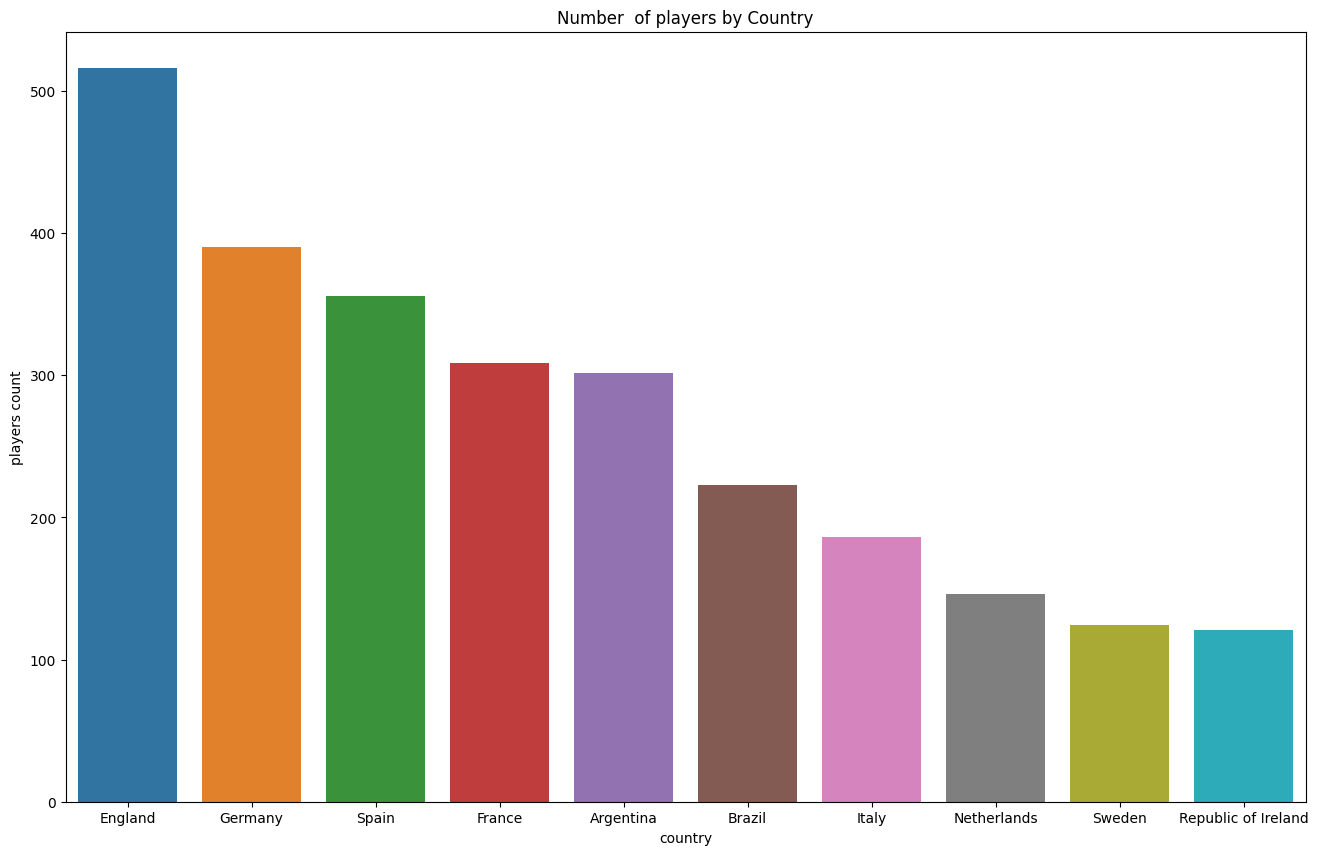

In [1333]:
players_by_country=cleaned_fifa_data.groupby(["country"])["player"].count().sort_values(ascending=False).reset_index(name='player_count')

plt.figure(figsize=(16,10))
sns.barplot(players_by_country.head(10),x="country",y="player_count",hue="country")
plt.title("Number  of players by Country")
plt.xlabel("country")
plt.ylabel("players count")
plt.show()

,country,player_count
0,England,516
1,Germany,390
2,Spain,356
3,France,309
4,Argentina,302
...,...,...
130,Puerto Rico,1
131,Indonesia,1
132,Honduras,1
133,Guyana,1


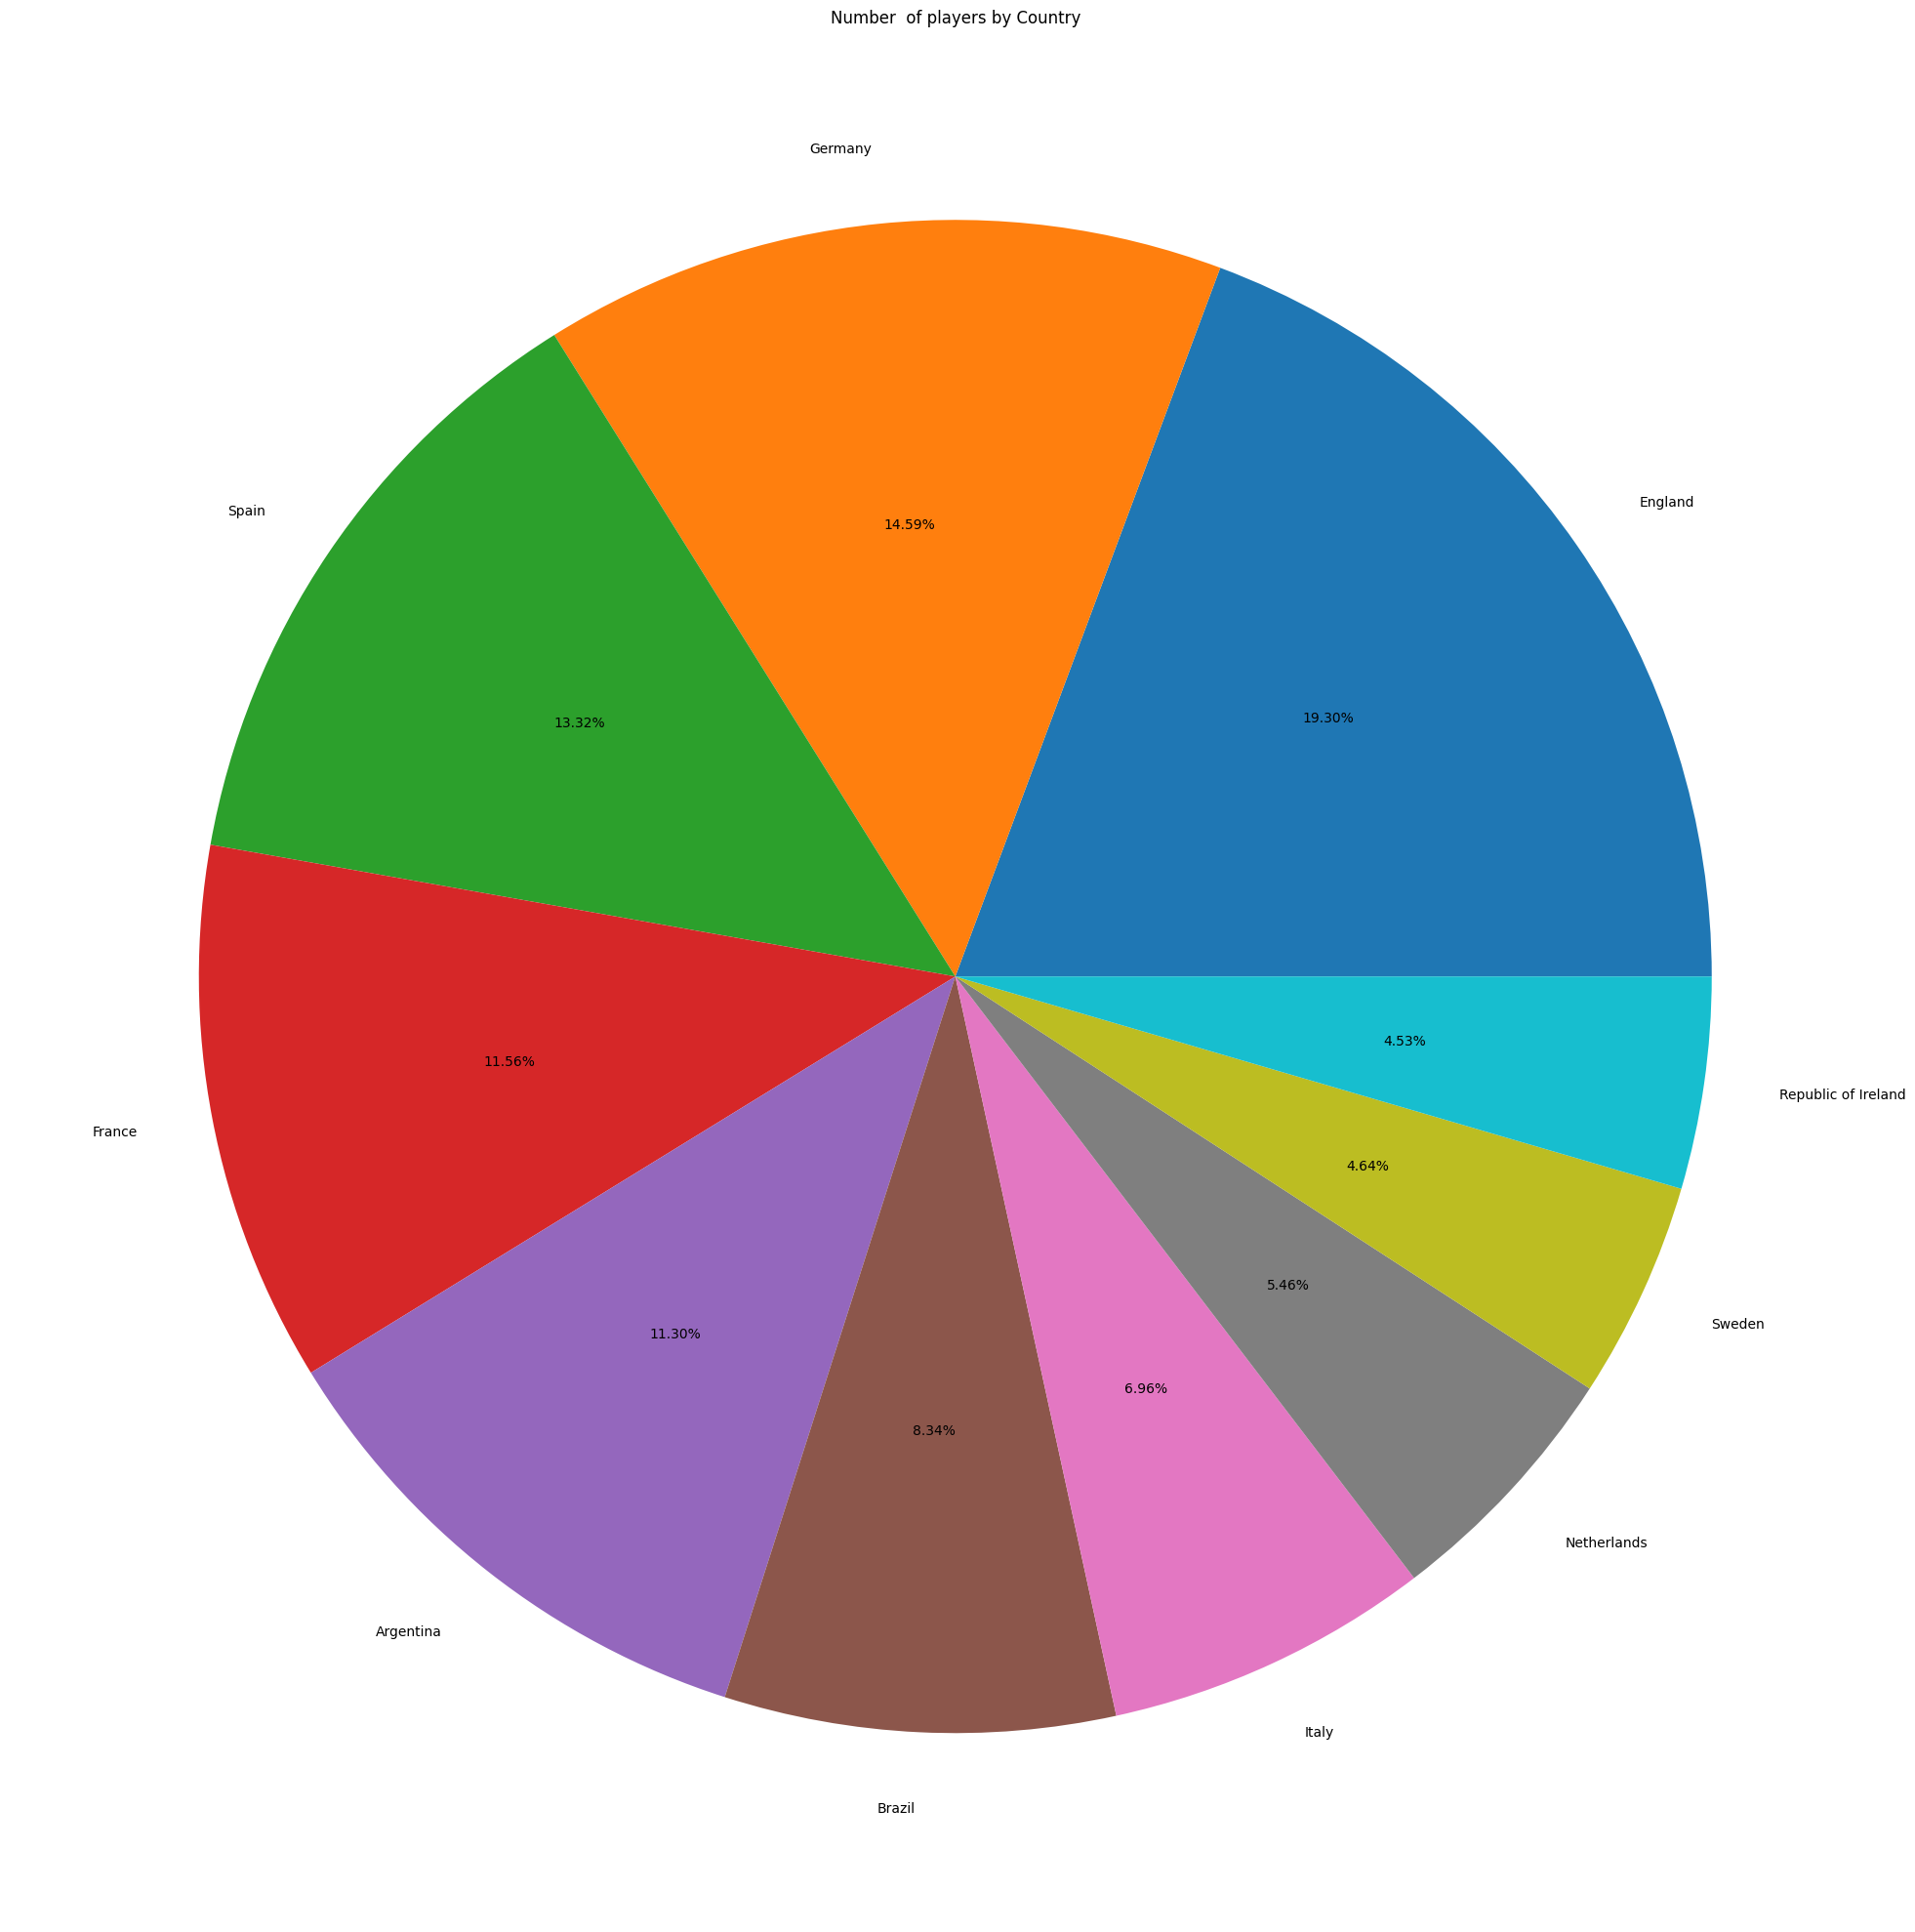

In [1334]:
plt.figure(figsize=(25,35))
plt.pie(x=players_by_country["player_count"].head(10),labels=players_by_country["country"].head(10),autopct='%1.2f%%')
plt.title("Number  of players by Country")
players_by_country

In [1335]:
value_for_country=cleaned_fifa_data.groupby("country")["value"].sum().sort_values(ascending=False).reset_index(name="value")
value_for_country.head(10)



,country,value
0,Spain,1.422554e+09
1,France,1.250789e+09
2,Brazil,1.156902e+09
3,England,8.943461e+08
4,Argentina,8.231620e+08
5,Germany,7.953930e+08
6,Italy,6.914955e+08
7,Portugal,6.241895e+08
8,Netherlands,4.831245e+08
9,Belgium,4.195650e+08


Text(0.5, 1.0, 'most valuable countries')

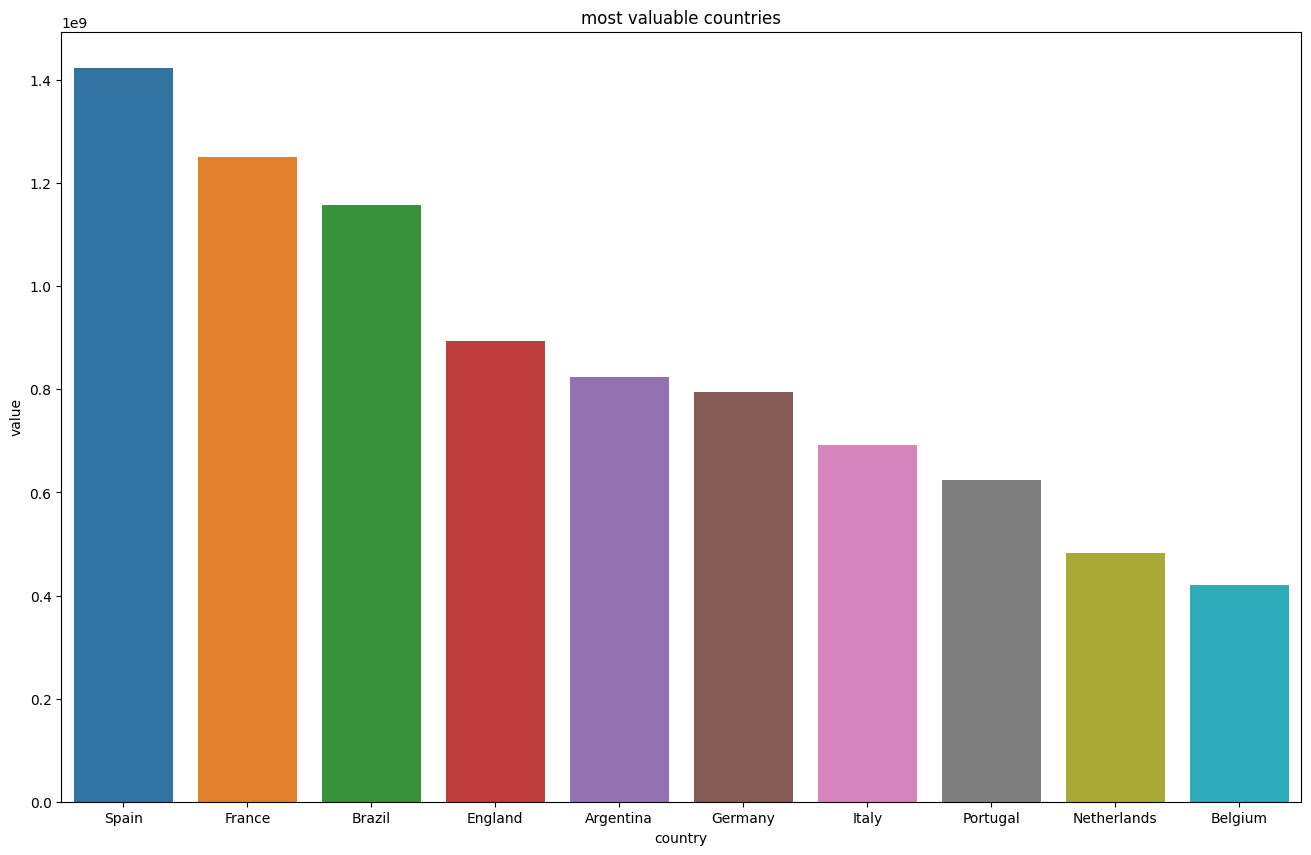

In [1336]:
plt.figure(figsize=(16,10))
sns.barplot(value_for_country.head(10),x=value_for_country["country"].head(10),y=value_for_country["value"].head(10),hue="country")
plt.title("most valuable countries")

In [1337]:
cleaned_fifa_data.head(1)

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,68,73,...,32,34,41,33,10,11,6,7,9,1400000.0


<Figure size 640x480 with 0 Axes>

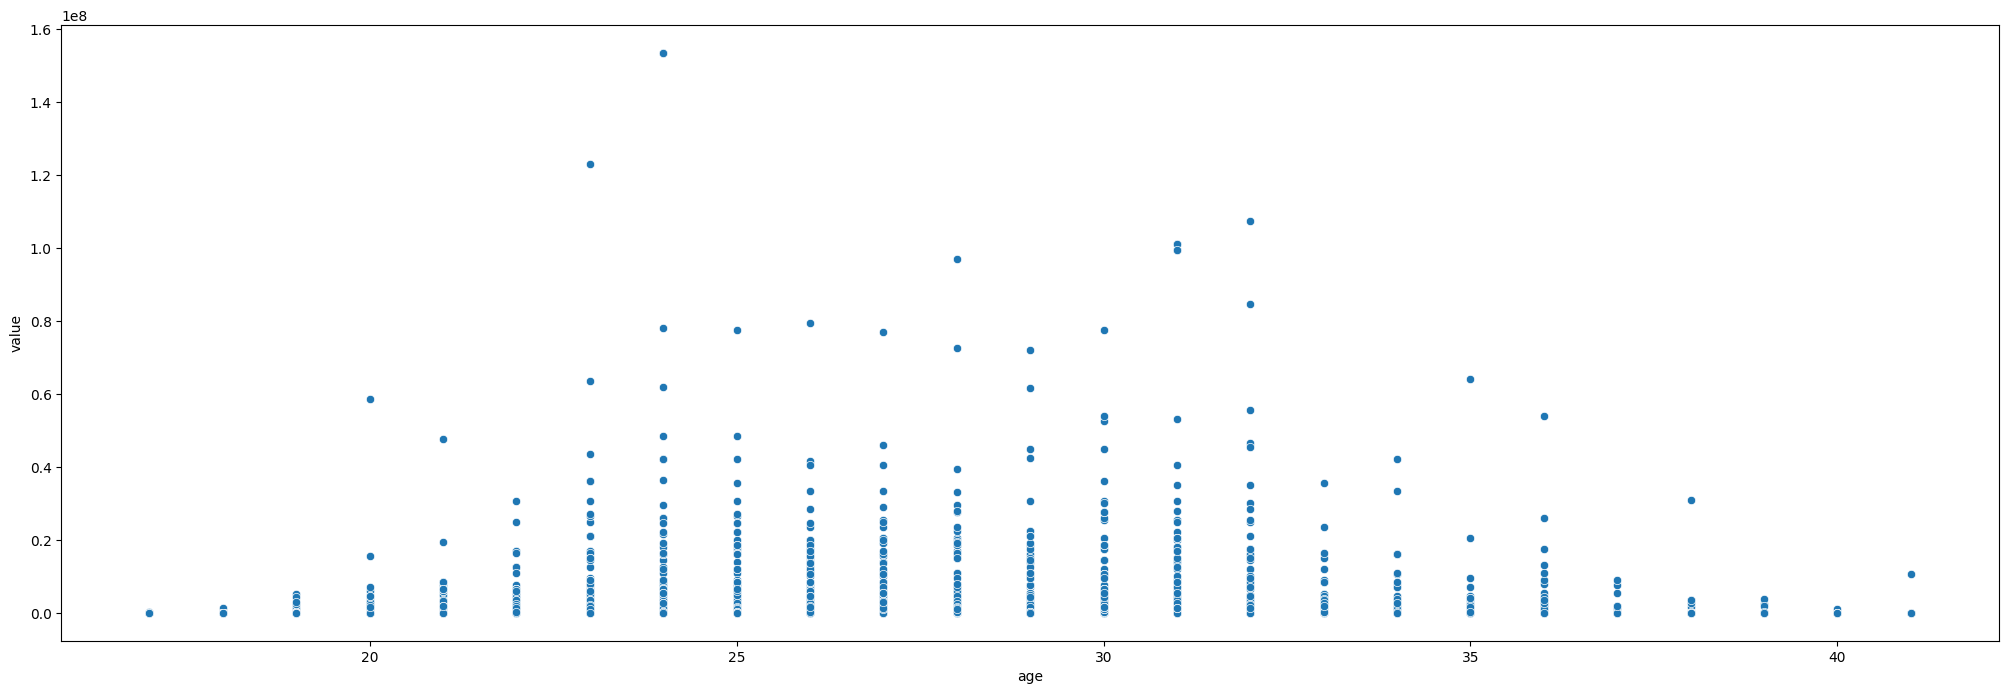

<Figure size 640x480 with 0 Axes>

In [1338]:
# correlation betwenn ages and value
plt.figure(figsize=(25,8))
sns.scatterplot(cleaned_fifa_data,x='age',y='value')
plt.figure("player value by age")


In [1339]:
best_value_player=cleaned_fifa_data[cleaned_fifa_data['value']==cleaned_fifa_data["value"].max()]
best_value_player

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
5229,Kylian MbappÃ©,France,182,73,24,Paris SG,91,93,32,34,...,80,69,84,83,11,13,5,7,6,153500000.0
5675,Kylian Mbappé,France,182,73,24,Paris SG,91,93,32,34,...,80,69,84,83,11,13,5,7,6,153500000.0


In [1340]:
worst_value_player=cleaned_fifa_data[cleaned_fifa_data['value']==cleaned_fifa_data["value"].min()]
worst_value_player

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
4730,Richard Brush,England,185,86,38,Sligo Rovers,17,11,10,13,...,10,14,19,17,56,55,55,55,56,400.0


In [1341]:
best_dribller=cleaned_fifa_data[cleaned_fifa_data['dribbling']==cleaned_fifa_data["dribbling"].max()]
best_dribller


,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
3555,Lionel Messi,Argentina,169,67,36,Paris SG,93,95,24,35,...,93,93,75,88,14,6,11,15,8,54000000.0
5679,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,29,32,...,88,87,91,86,15,9,9,15,11,99500000.0


In [1342]:
clubs_by_values=cleaned_fifa_data.groupby(["club"])["value"].sum().sort_values(ascending=False).reset_index(name='value')

clubs_by_values

,club,value
0,Manchester City,427033500.0
1,FC Bayern MÃ¼nchen,409543000.0
2,Paris SG,400725000.0
3,Manchester Utd,348327500.0
4,Liverpool,314188500.0
...,...,...
684,UCD AFC,69000.0
685,Odisha FC,67500.0
686,Hebei FC,58000.0
687,Dundalk,50000.0


In [1343]:
most_valuble_club=clubs_by_values.iloc[0]
most_valuble_club

club     Manchester City 
value         427033500.0
Name: 0, dtype: object

In [1344]:
least_valuable_club=clubs_by_values.iloc[-1]
least_valuable_club

club     Kerala Blasters 
value             35000.0
Name: 688, dtype: object

In [1345]:
oldest_players=cleaned_fifa_data[cleaned_fifa_data["age"]==cleaned_fifa_data["age"].max()]
oldest_players

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
1574,AntolÃ­n AlcÃ¡raz,Paraguay,187,78,41,Olimpia,61,57,73,74,...,32,35,48,35,16,8,11,10,11,32500.0
3930,Pepe Reina,Spain,188,92,41,Villarreal CF,23,10,24,22,...,11,11,24,11,79,75,77,79,76,27500.0
4422,Diego LÃ³pez,Spain,196,89,41,Rayo Vallecano,25,11,14,13,...,10,11,21,14,80,76,78,68,76,45000.0
5409,Enrique Bologna,Argentina,189,87,41,Defensa,32,22,17,22,...,16,18,25,10,70,73,66,71,73,5000.0
5681,Zlatan Ibrahimovi?,Sweden,195,102,41,Milan,85,75,24,37,...,79,74,80,87,9,13,15,10,12,10500000.0


In [1346]:
youngest_players=cleaned_fifa_data[cleaned_fifa_data["age"]==cleaned_fifa_data["age"].min()]
youngest_players

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
58,Nestory Irankunda,Australia,174,74,17,Adelaide United,58,64,20,27,...,45,60,53,44,7,8,10,12,8,16000.0
229,Darius Lipsiuc,Republic of Ireland,180,66,17,St. Pats,54,54,41,44,...,49,41,51,40,7,9,13,11,9,9000.0
556,Sam Curtis,Republic of Ireland,180,80,17,St. Pats,59,57,57,59,...,35,26,39,29,7,13,7,7,13,18000.0
880,Arijon Ibrahimovic,Germany,176,71,17,FC Bayern MÃ¼nchen,66,62,28,23,...,64,55,60,65,10,12,12,10,8,22000.0
1059,Aleksander Kjelsen,Norway,183,72,17,VÃ¥lerenga Fotball,42,36,54,56,...,26,23,33,29,8,8,6,9,14,9000.0
1258,Jones El-Abdellaoui,Norway,184,72,17,VÃ¥lerenga Fotball,59,58,23,24,...,53,44,48,48,9,9,15,8,8,16000.0
1673,George Barrett,England,180,60,17,Walsall,13,5,14,12,...,14,10,16,6,49,51,49,45,52,3500.0
1711,Sebastian Borza,Romania,183,72,17,Farul ConstanÈa,44,45,56,55,...,45,32,35,21,7,9,7,8,11,13000.0
2124,Patrick Nuamah,Italy,170,65,17,Brescia,53,49,49,53,...,51,50,42,45,14,6,12,9,5,8000.0
2537,Frederic Soelle Soelle,Belgium,188,79,17,KV Mechelen,61,53,33,28,...,29,36,56,43,13,14,7,11,8,15000.0


In [1347]:
cleaned_fifa_data.head(1)

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,68,73,...,32,34,41,33,10,11,6,7,9,1400000.0


In [1348]:

x=cleaned_fifa_data.drop(columns=["player",'country',"club","value","heading",'jumping','balance',"strength","weight","height","slide_tackle","stand_tackle"])
y=cleaned_fifa_data[["value"]]


<Axes: >

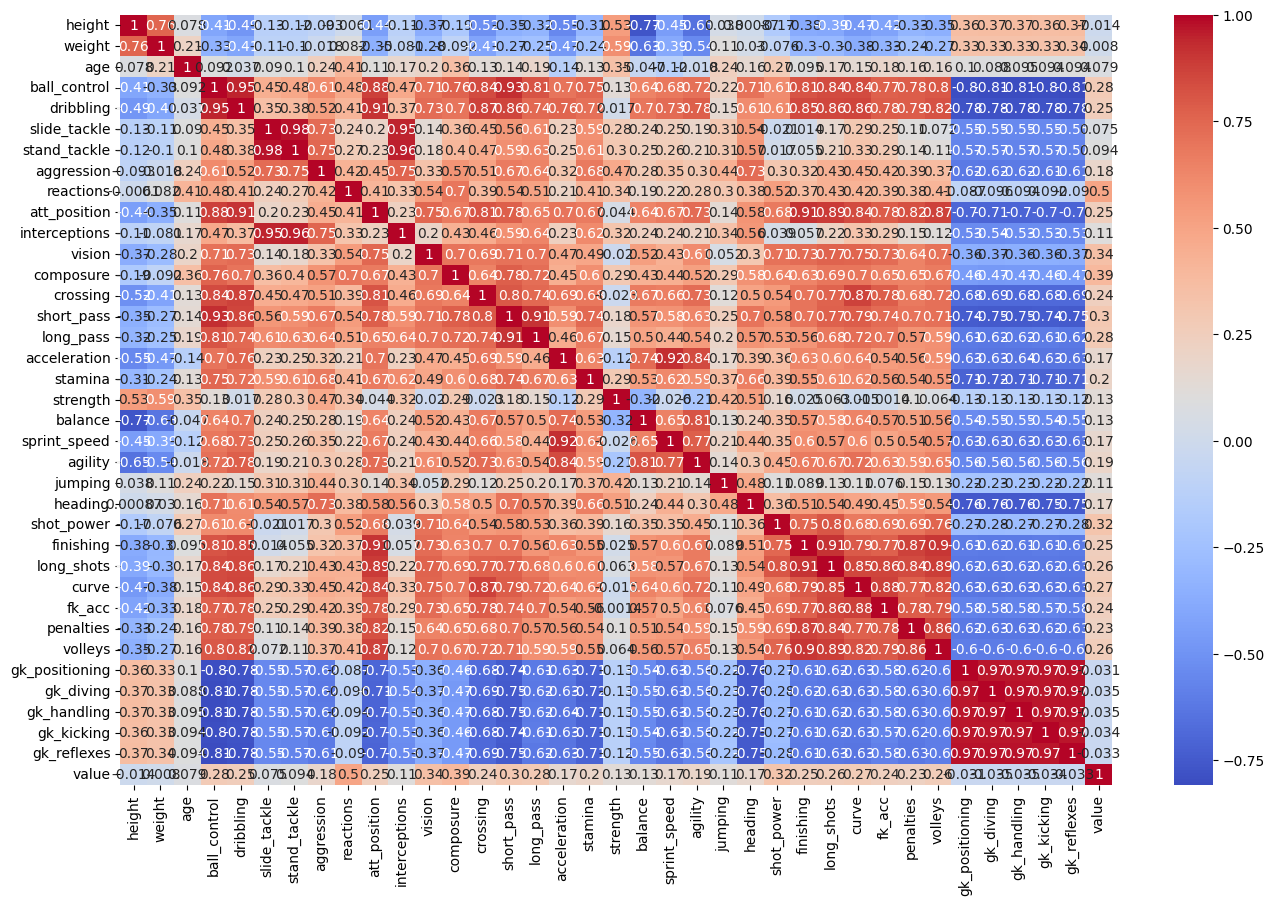

In [1349]:
numerice_data=cleaned_fifa_data.drop(columns=["player",'country',"club"])
plt.figure(figsize=(16,10))
sns.heatmap(numerice_data.corr(),annot=True,cmap="coolwarm")

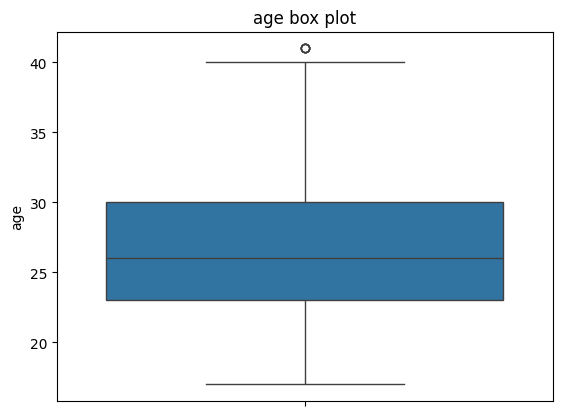

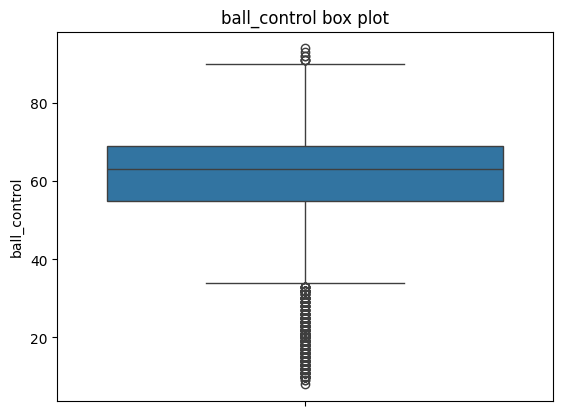

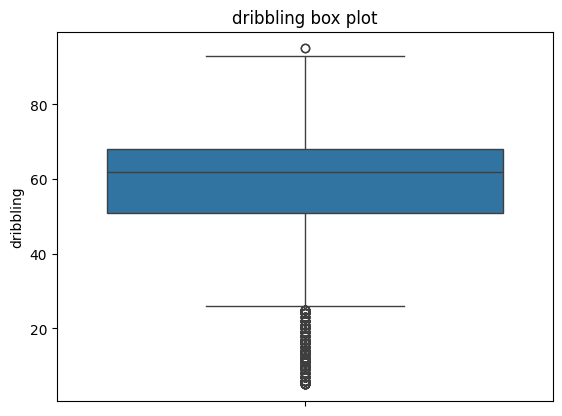

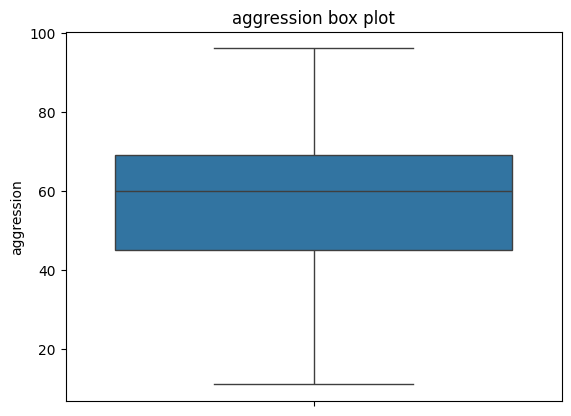

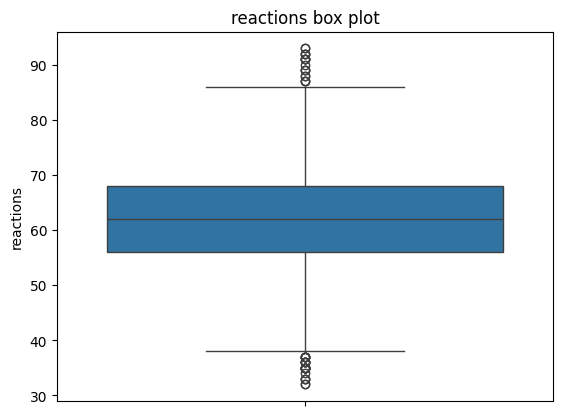

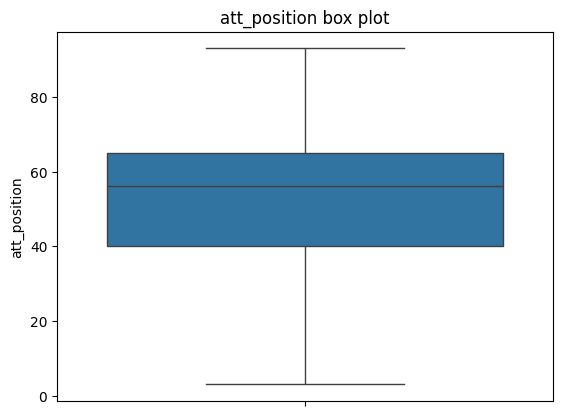

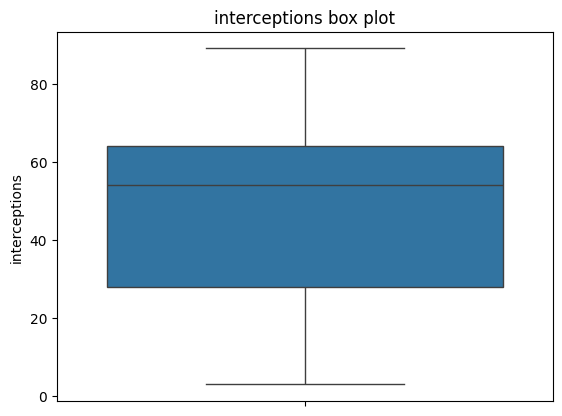

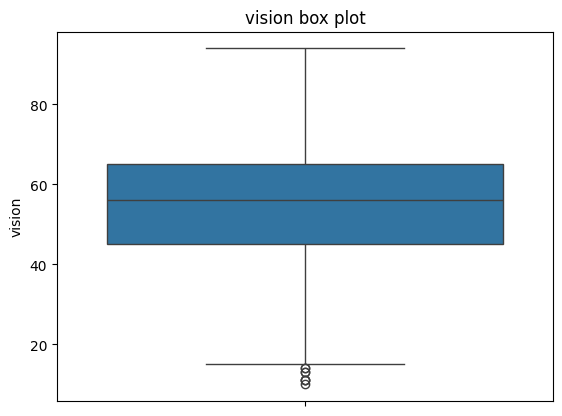

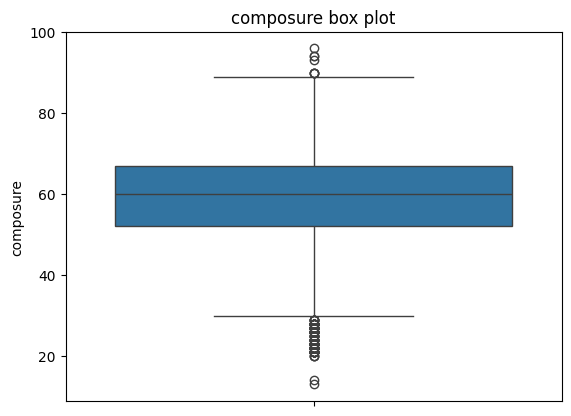

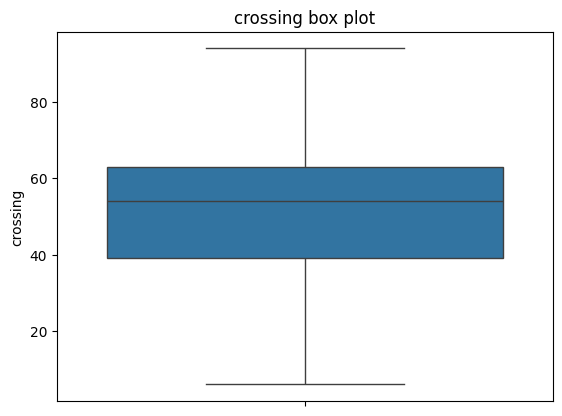

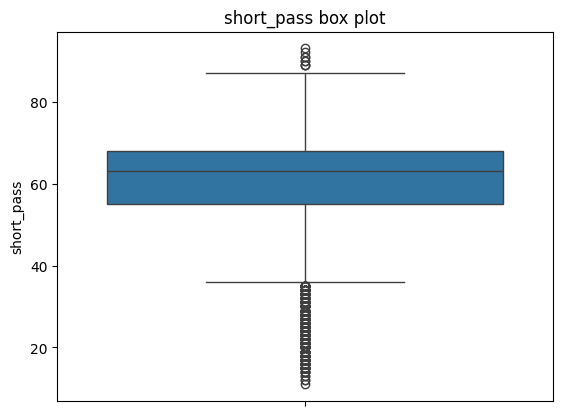

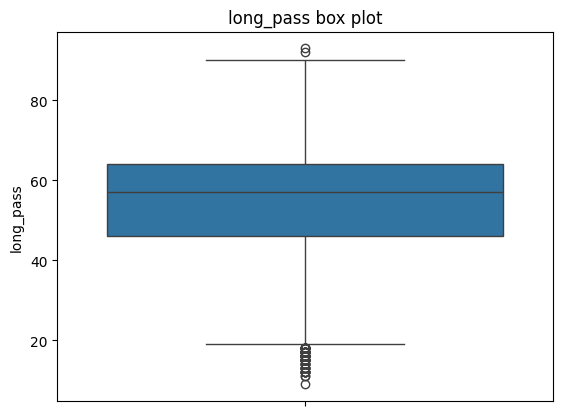

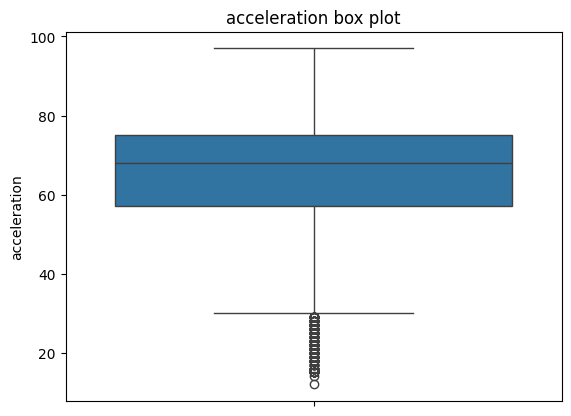

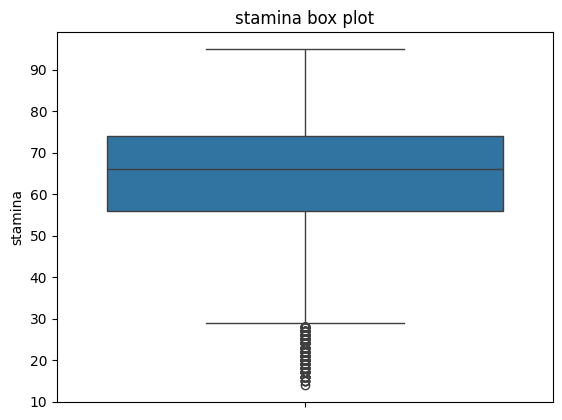

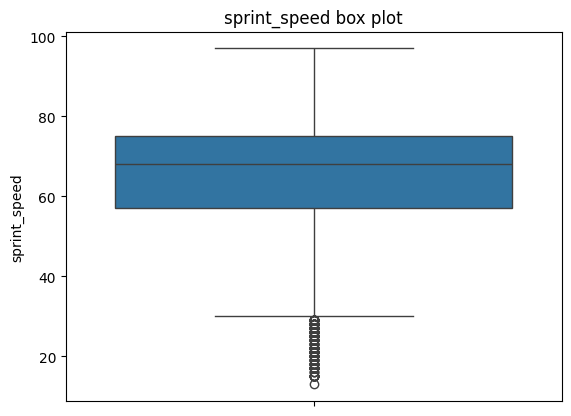

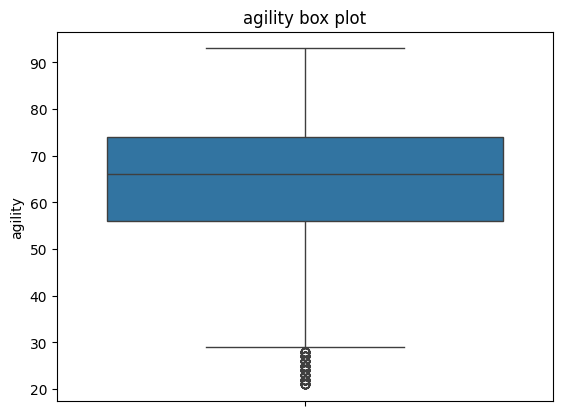

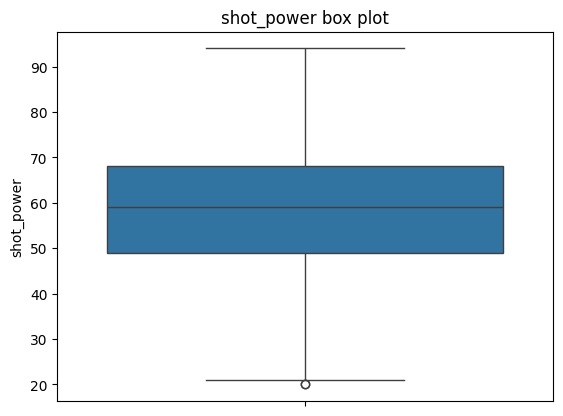

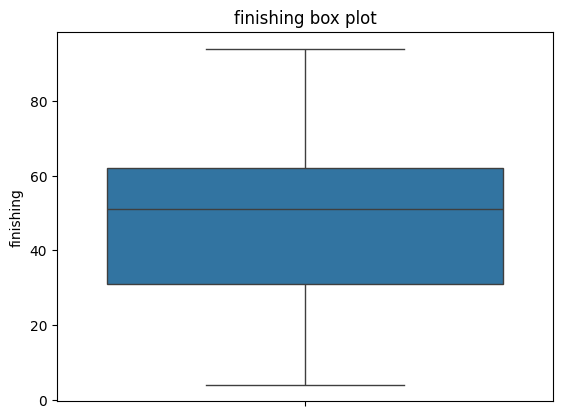

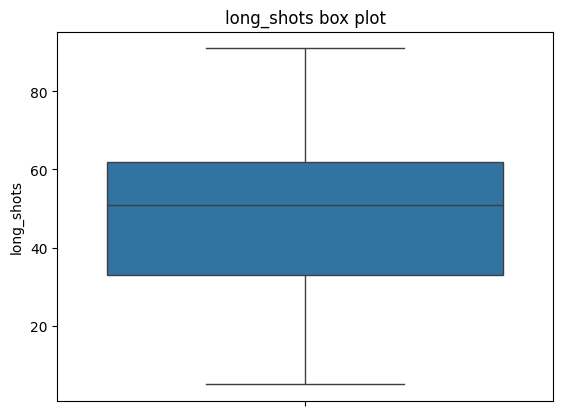

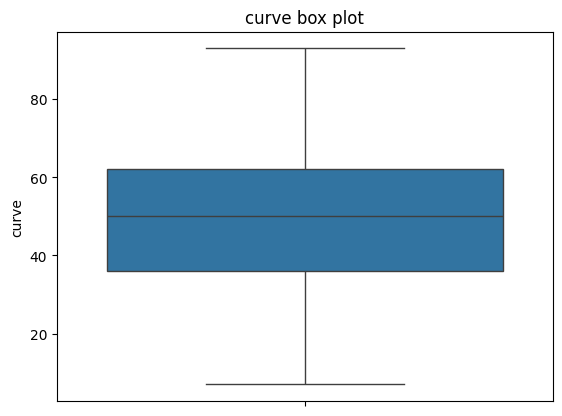

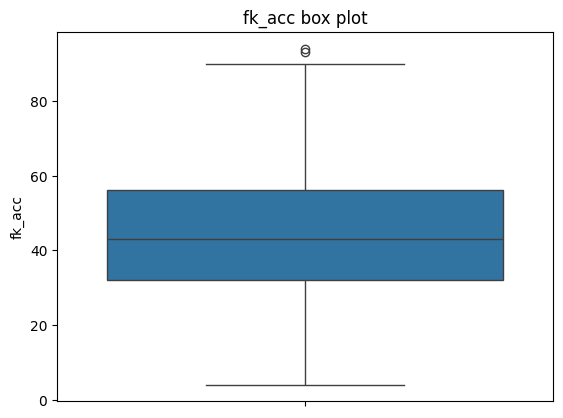

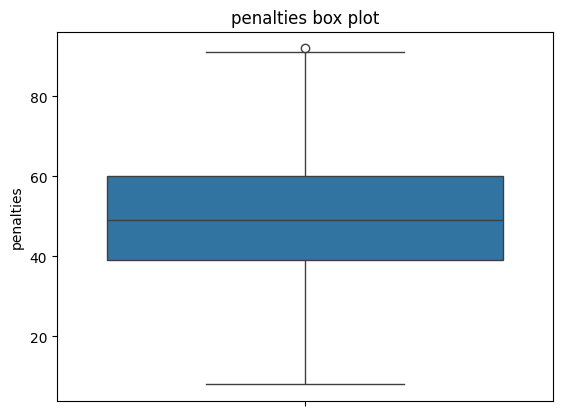

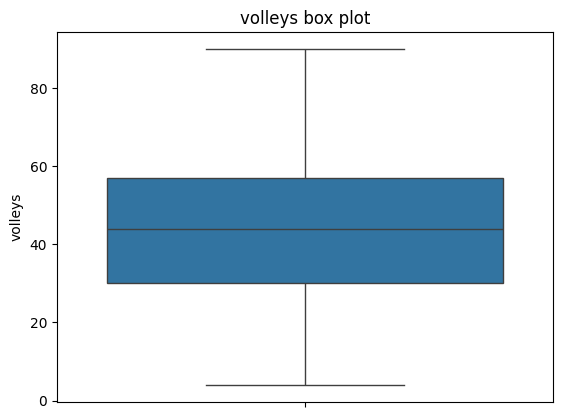

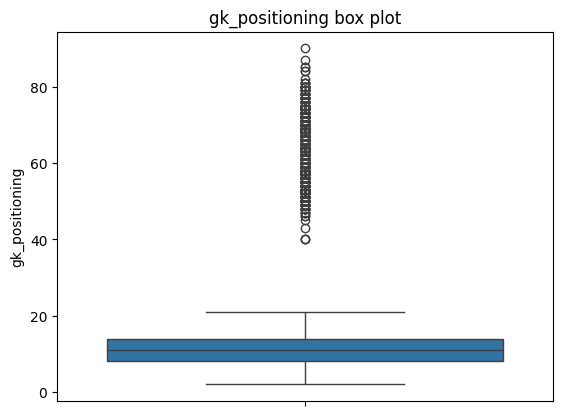

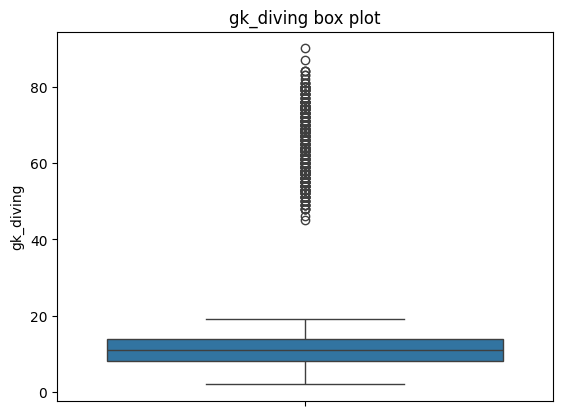

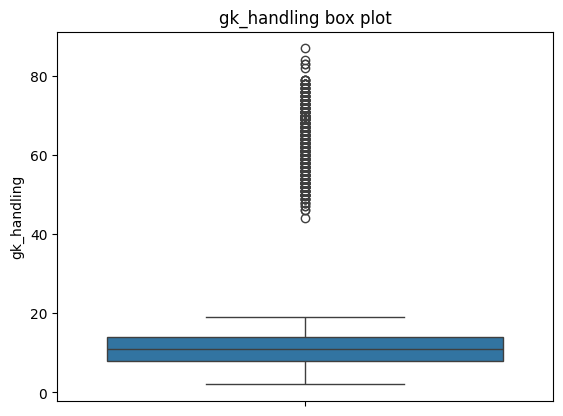

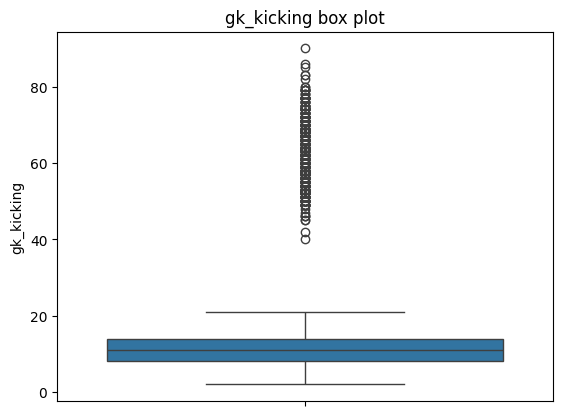

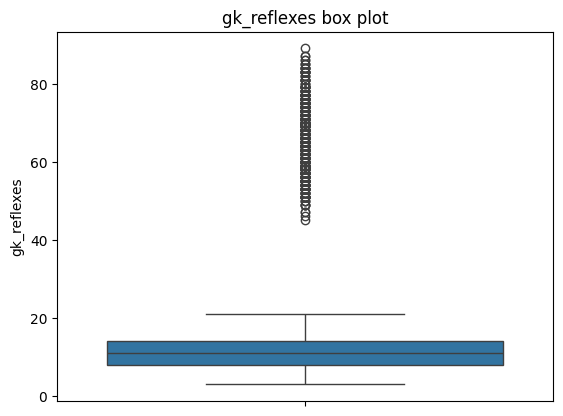

In [1350]:
for c in x.columns:
    sns.boxplot(x[c])
    plt.title(f"{c} box plot")
    plt.show()


In [1351]:
print(x.shape)
print(y.shape)



(5682, 28)
(5682, 1)


In [1352]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1353]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [1354]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [1355]:
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

c:\Users\izuna\miniconda3\envs\torch-env\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [1356]:
ypred=model.predict(x_test)

In [1357]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,ypred)
r2=r2_score(y_test,ypred)
print("MSE:", mse)
print("R2 Score:", r2)


MSE: 5030509943502.963
R2 Score: 0.8973163852663891
